Dataset: https://www.kaggle.com/arjuntejaswi/plant-village

Note: Dataset contains various plant images we will consider only potato leaves images

In [73]:
#importing our libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
#Directories we will work with
import os
# Walk through plant village directory and list number of files
for dirpath, dirnames, filenames in os.walk("Colab"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Colab'.
There are 3 directories and 0 images in 'Colab\test'.
There are 0 directories and 32 images in 'Colab\test\early blight'.
There are 0 directories and 32 images in 'Colab\test\healthy'.
There are 0 directories and 32 images in 'Colab\test\late blight'.
There are 3 directories and 0 images in 'Colab\train'.
There are 0 directories and 120 images in 'Colab\train\early blight'.
There are 0 directories and 120 images in 'Colab\train\healthy'.
There are 0 directories and 120 images in 'Colab\train\late blight'.


In [5]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("Colab/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['early blight' 'healthy' 'late blight']


In [6]:
class_names

array(['early blight', 'healthy', 'late blight'], dtype='<U12')

In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['1d18a770-8a16-4765-bae9-5d96f781db89___RS_Early.B 7803.JPG']
Image shape: (256, 256, 3)


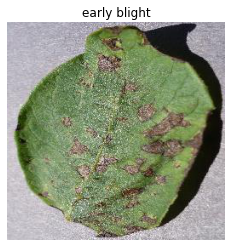

In [14]:
# View a random image from the training dataset
img = view_random_image(target_dir='Colab/train/',
                        target_class='early blight')

Starting to build our model

In [23]:
#loading our data from directories into train and test dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)


train_data = train_datagen.flow_from_directory(directory= 'Colab/train/',
                                              target_size=(224,224),shuffle=True)

test_data = test_datagen.flow_from_directory(directory='Colab/test/',
                                            target_size=(224,224),shuffle=True)

Found 360 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


32

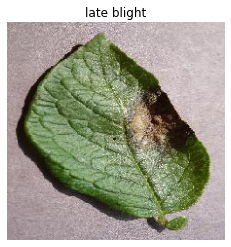

In [78]:
#viewing one image from training data set
#Note: Training dataset is in batches of 32 and since there are 360 images so there are 11 groups(360/32 is almost 11)
i=8
images,labels=train_data[8] #batch from which image is to be viewed
plt.imshow(images[i])#image to be viewed
plt.title(class_names[labels[i].argmax()])
plt.axis(False)
len(images)

In [57]:
#importing handy functions
import tensorflow as tf
import pandas as pd

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy,categorical_crossentropy

In [79]:
#Preparing base model from scratch

model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation="softmax") 
])

In [80]:
#Compiling model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
#Fitting model
model_1.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
12/12 [==============================] - 21s 2s/step - loss: 1.1040 - accuracy: 0.3306 - val_loss: 1.0898 - val_accuracy: 0.3438
Epoch 2/5
12/12 [==============================] - 23s 2s/step - loss: 1.0730 - accuracy: 0.4056 - val_loss: 1.0529 - val_accuracy: 0.4896
Epoch 3/5
12/12 [==============================] - 21s 2s/step - loss: 0.9347 - accuracy: 0.7278 - val_loss: 0.8037 - val_accuracy: 0.6771
Epoch 4/5
12/12 [==============================] - 22s 2s/step - loss: 0.6318 - accuracy: 0.7389 - val_loss: 0.6234 - val_accuracy: 0.7812
Epoch 5/5
12/12 [==============================] - 23s 2s/step - loss: 0.4137 - accuracy: 0.8417 - val_loss: 0.4473 - val_accuracy: 0.8438


In [82]:
#evaluating base model
model_1.evaluate(test_data)

3/3 [==============================] - 1s 170ms/step - loss: 0.4473 - accuracy: 0.8438


[0.447346955537796, 0.84375]

Since our base model is performing poorly we will try to improve accuracy and for that we will use more layers

In [83]:
model_2 = Sequential([
    Conv2D(filters=32,padding='valid',kernel_size=3,activation='relu',input_shape=(224,224,3)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation='softmax')
])


#compling base maodel

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fitting on base model on train_ds and val_ds

model_2.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
12/12 [==============================] - 47s 4s/step - loss: 1.2224 - accuracy: 0.3972 - val_loss: 1.0193 - val_accuracy: 0.3854
Epoch 2/5
12/12 [==============================] - 45s 4s/step - loss: 0.7794 - accuracy: 0.6333 - val_loss: 0.4611 - val_accuracy: 0.8333
Epoch 3/5
12/12 [==============================] - 45s 4s/step - loss: 0.4959 - accuracy: 0.8056 - val_loss: 0.3793 - val_accuracy: 0.8229
Epoch 4/5
12/12 [==============================] - 57s 5s/step - loss: 0.2803 - accuracy: 0.8833 - val_loss: 0.2454 - val_accuracy: 0.9167
Epoch 5/5
12/12 [==============================] - 46s 4s/step - loss: 0.1849 - accuracy: 0.9111 - val_loss: 0.3519 - val_accuracy: 0.8542


In [84]:
model_2.evaluate(test_data)

3/3 [==============================] - 1s 375ms/step - loss: 0.3519 - accuracy: 0.8542


[0.35185495018959045, 0.8541666865348816]

Our model accuracy is increased dramitically just by adjusting layers. We will try to use to predict on our custom data(prediction on images downloadad fromm google)

In [85]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, IMAGE_SHAPE)

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [86]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names,IMAGE_SGAPE=(224,224)):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} \n original: {filename[11:]}")
  plt.axis(False);

In [87]:
#combining above two fnctions into one
def load_pred_plot(filename,model,IMAGE_SHAPE=(224,224),class_names=class_names):
    """Loads the image from given path in filename,reads it,decode it,resize it and resccale it.
    And predicts
    """
    import tensorflow as tf
    
    #read image
    img = tf.io.read_file(filename)
    
    #decode it
    img = tf.image.decode_image(img,channels=3)
    
    #reshape it
    img = tf.image.resize(img,IMAGE_SHAPE)
    
    #rescsale it
    img = img/255.0
    
    #predicting
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    #add logic for multi class
    if len(pred[0])>1:
        pred_class = class_names[tf.argmax(pred[0])]
    
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
        
    #plot the image
    
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class} \n Original: {filename[11:]}")
    plt.axis(False)
    

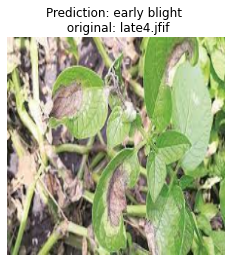

In [92]:
#making custom predictions from our trained model
pred_and_plot(model=model_2,filename='New Folder/late4.jfif')

In [ ]:
load_pred_plot(filename="New Folder/late2.jfif",model=efficientnet_model)

In [ ]:
filenames

In [93]:
#to visualize multiple predictions provide model and complete path
def n_pred_and_plot(n,r,model,path,figsize=(15,10)):
    filenames = tf.io.gfile.listdir(
    path=path
    )
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    for i in range(n*r):
        plt.subplot(n,r,i+1)
        pred_and_plot(model,filename='New Folder/' + filenames[i+1])

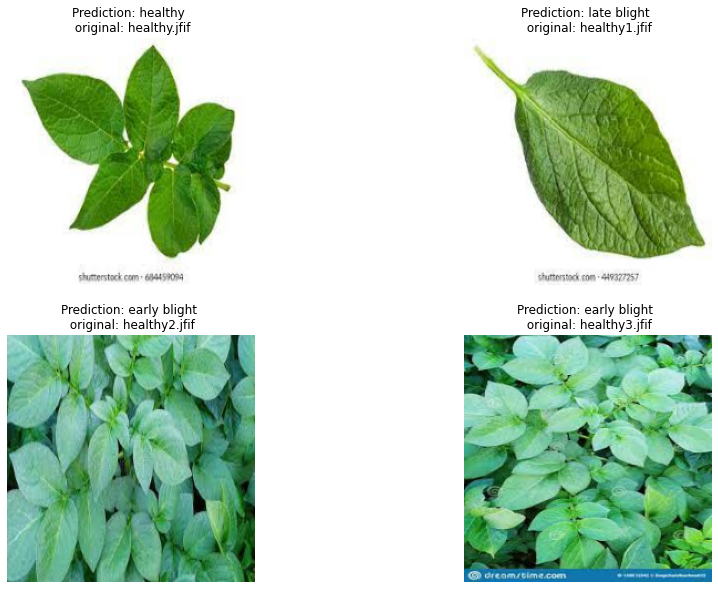

In [94]:
n_pred_and_plot(model=model_2,n=2,r=2,path='New Folder')

Creating another model using Transfer learning

In [95]:
import tensorflow_hub as hub
def create_model(model_url, num_classes,IMAGE_SHAPE=(224,224)):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [96]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
IMAGE_SHAPE=(224,224)
from tensorflow.keras import layers

In [97]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=5, 
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              )

Epoch 1/5
12/12 [==============================] - 33s 2s/step - loss: 0.9185 - accuracy: 0.6528 - val_loss: 0.6577 - val_accuracy: 0.8958
Epoch 2/5
12/12 [==============================] - 24s 2s/step - loss: 0.5437 - accuracy: 0.9111 - val_loss: 0.4284 - val_accuracy: 0.9375
Epoch 3/5
12/12 [==============================] - 24s 2s/step - loss: 0.3663 - accuracy: 0.9444 - val_loss: 0.3210 - val_accuracy: 0.9479
Epoch 4/5
12/12 [==============================] - 24s 2s/step - loss: 0.2734 - accuracy: 0.9611 - val_loss: 0.2723 - val_accuracy: 0.9271
Epoch 5/5
12/12 [==============================] - 25s 2s/step - loss: 0.2250 - accuracy: 0.9639 - val_loss: 0.2371 - val_accuracy: 0.9375


In [98]:
# vgg_model_url='https://tfhub.dev/emilutz/vgg19-block1-conv2-unpooling-encoder/1'
agri_model_url = 'https://tfhub.dev/agripredict/disease-classification/1'
    
# Create model
agri_model = create_model(model_url=agri_model_url,
                                  num_classes=train_data.num_classes,IMAGE_SHAPE=(300,300))

# Compile EfficientNet model
agri_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# # Fit EfficientNet model 
agri_history = agri_model.fit(train_data,
                              epochs=10, 
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data),
                                      )    

Epoch 1/10
12/12 [==============================] - 21s 1s/step - loss: 1.0921 - accuracy: 0.3583 - val_loss: 1.1180 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 1.0834 - accuracy: 0.3667 - val_loss: 1.1095 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 16s 1s/step - loss: 1.0752 - accuracy: 0.3778 - val_loss: 1.1009 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 16s 1s/step - loss: 1.0663 - accuracy: 0.3944 - val_loss: 1.0927 - val_accuracy: 0.3438
Epoch 5/10
12/12 [==============================] - 19s 2s/step - loss: 1.0579 - accuracy: 0.4972 - val_loss: 1.0846 - val_accuracy: 0.4792
Epoch 6/10
12/12 [==============================] - 14s 1s/step - loss: 1.0495 - accuracy: 0.5583 - val_loss: 1.0767 - val_accuracy: 0.5000
Epoch 7/10
12/12 [==============================] - 18s 1s/step - loss: 1.0418 - accuracy: 0.5639 - val_loss: 1.0691 - val_accuracy: 0.5208
Epoch 8/10
12/12 [==

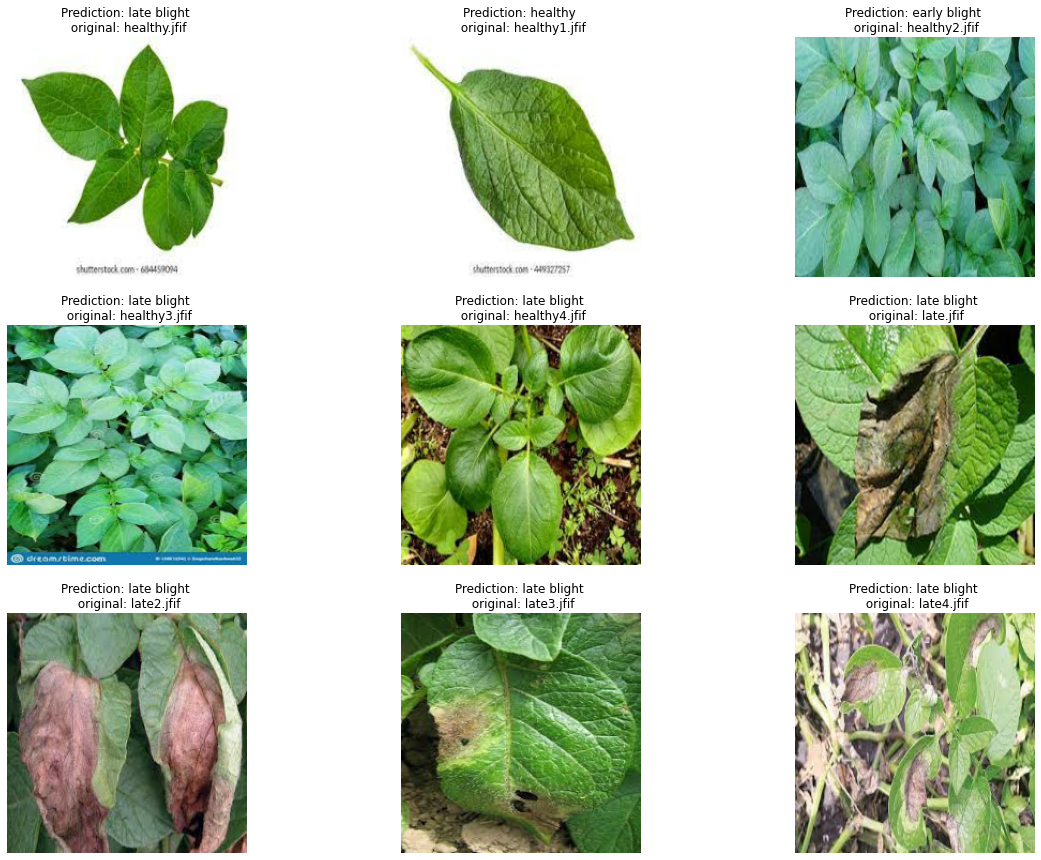

In [99]:
n_pred_and_plot(model=efficientnet_model,n=3,r=3,path='New Folder',figsize=(20,15))

In [16]:
class_names

array(['early blight', 'healthy', 'late blight'], dtype='<U12')